# Regularizacija

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from sklearn import linear_model

In [3]:
np.random.seed(23)

Posmatrajmo jedan sintetički skup podataka sa 100 instanci u kojem su atributi korelisani. Proverimo kako ovo ponašanje utiču na koeficijente regresionog modela ukoliko se koriste različite regularizacije. 

In [4]:
N = 100

X1 = np.random.uniform(-1, 1, N)
X2 = np.random.uniform(-1, 1, N)

# između prvog i drugog atributa postoji linearna zavisnost
# između prvog i trećeg atributa postoji mala razlika u vidu normalnog šuma iz normalne raspodele N(0, 1)
X = np.vstack([X1, 4*X1, X1 + np.random.normal(0, 1, N), X2]).transpose()

# vrednost ciljne promenljive je linearna kombinacija X1 i X2
y = (2 + np.random.normal(size=N))*X1 + (3 + np.random.normal(size=N))*X2

Pošto nas samo zanima kako se ponašaju koeficijenti modela, za treniranje ćemo koristiti ceo skup. Takođe, iz ovih razloga se nećemo baviti ni određivanjem optimalnih vrednosti hiperparametara gde je to moguće.

### 1. Linearna regresija

In [5]:
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
model.score(X, y)

0.909655056851071

In [7]:
model.coef_

array([0.10157081, 0.40628325, 0.07855786, 2.88608866])

### 2. Grebena linearna regresija (linearna regresija sa l2 regularizacijom)

In [8]:
ridge_model = linear_model.Ridge(alpha=0.2)
ridge_model.fit(X, y)

Ridge(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [9]:
ridge_model.score(X, y)

0.909631949282924

In [10]:
ridge_model.coef_

array([0.10154992, 0.40619969, 0.07921178, 2.86842588])

### 3. Linearna regresija sa Laso regularizacijom (l1 regularizacijom)

In [11]:
lasso_model = linear_model.Lasso(alpha=0.1)
lasso_model.fit(X, y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [12]:
lasso_model.score(X, y)

0.9012938600028955

In [13]:
lasso_model.coef_

array([0.        , 0.43124743, 0.        , 2.58888578])

### 4. Linearna regresija sa  ElasticNet regularizacijom (kombinacija l1 i l2 regularizacije)

In [14]:
elastic_model = linear_model.ElasticNet(alpha=1, l1_ratio = 0.5)
elastic_model.fit(X, y)

ElasticNet(alpha=1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [15]:
elastic_model.score(X, y)

0.4800011500939737

In [16]:
elastic_model.coef_

array([0.        , 0.34881454, 0.        , 0.54304144])

### Grafički prikaz vrednosti koeficijenata

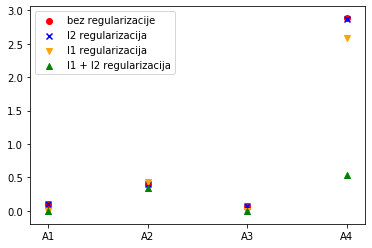

In [17]:
number_of_features = X.shape[1]
plt.xticks(np.arange(0, number_of_features), ['A1', 'A2', 'A3', 'A4'])
plt.scatter(np.arange(0, number_of_features), model.coef_, color='red', marker='o', label='bez regularizacije' )
plt.scatter(np.arange(0, number_of_features), ridge_model.coef_, color='blue', marker='x', label='l2 regularizacija')
plt.scatter(np.arange(0, number_of_features), lasso_model.coef_, color='orange', marker='v', label='l1 regularizacija')
plt.scatter(np.arange(0, number_of_features), elastic_model.coef_, color='green', marker='^', label='l1 + l2 regularizacija')
plt.legend(loc='best')
plt.show()

Kao što možemo primetiti, prisustvo l1 regularizacije koeficijente koji stoje uz atribute A1 i A3 svodi na nulu. 